# Declare necessary libraries

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, kpss

# Loading and standardization data

In [2]:

import pandas as pd

def load_prepare_data(file_path):
    # Đọc dòng đầu tiên để xác định dấu phân tách
    with open(file_path, 'r', encoding='utf-8') as f:
        first_line = f.readline()
    
    # Xác định dấu phân tách (';' hoặc ',')
    sep = ';' if ';' in first_line else ','
    
    # Đọc file CSV với dấu phân tách đã xác định
    try:
        df = pd.read_csv(file_path, sep=sep)
    except Exception as e:
        print(f"Error reading file {file_path}: {e}")
        return None
    
    print(f"Processing file: {file_path}")
    print("Columns:", df.columns.tolist())
    
    # Định nghĩa các cột cần giữ cho từng loại file
    columns_to_keep = []
    
    # Trường hợp 1: Dữ liệu có cột 'timeOpen', 'timeClose', 'name', 'close', ...
    if {'timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'name', 'open', 'high', 'low', 'close', 'volume', 'marketCap', 'timestamp'}.issubset(df.columns):
        columns_to_keep = ['timeClose', 'close']
    
    # Trường hợp 2: Dữ liệu có cột 'Date', 'Open', 'High', 'Low', 'Close', ...
    elif {'Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'}.issubset(df.columns):
        columns_to_keep = ['Date', 'Close']
    
    # Trường hợp 3: Dữ liệu có cột 'Date', 'Price', 'Open', ...
    elif {'Date', 'Price', 'Open', 'High', 'Low', 'Change %'}.issubset(df.columns):
        columns_to_keep = ['Date', 'Price']
    
    # Lọc các cột cần thiết nếu tìm thấy
    if columns_to_keep:
        df = df[columns_to_keep]
    else:
        print(f"No recognized columns to keep for file: {file_path}")
        return None
    
    # **Xử lý cột giá cả ('Price', 'Close', 'close')**
    for col in ['Price', 'Close', 'close']:
        if col in df.columns:
            # Loại bỏ các ký tự không cần thiết và chuyển đổi sang kiểu số
            df[col] = df[col].replace({'"': '', ',': ''}, regex=True)
            df[col] = df[col].replace({r'[^0-9.\-]': ''}, regex=True)
            df[col] = pd.to_numeric(df[col], errors='coerce')
    
     # Xử lý cột thời gian ('Date', 'timeClose') và các cột thời gian khác nếu có
    if 'Date' in df.columns:
        try:
            df['Date'] = pd.to_datetime(df['Date'], utc=True, errors='coerce').dt.tz_convert(None).dt.date
        except Exception as e:
            print(f"Error converting 'Date' in {file_path}: {e}")
    
    if 'timeClose' in df.columns:
        try:
            df['timeClose'] = pd.to_datetime(df['timeClose'], utc=True, errors='coerce').dt.tz_convert(None).dt.date
        except Exception as e:
            print(f"Error converting 'timeClose' in {file_path}: {e}")
    
    return df



In [3]:
Bitcoin = load_prepare_data(r'1stJan2017 - 11thNov2024\crypto - format 1\Bitcoin_11_21_2016-1_20_2017_historical_data_coinmarketcap.csv')
SP500 = load_prepare_data(r'1stJan2017 - 11thNov2024/format 2/SP500.csv')
Gold = load_prepare_data(r'1stJan2017 - 11thNov2024\format 3\XAU_USD Historical Data.csv')
Silver = load_prepare_data(r'1stJan2017 - 11thNov2024\format 3\XAG_USD Historical Data (1).csv')
Tbond = load_prepare_data(r'1stJan2017 - 11thNov2024\format 3\United States 10-Year Bond Yield Historical Data (1).csv')
IMUS = load_prepare_data(r'1stJan2017 - 11thNov2024\format 2\IMUS.csv')
WTI = load_prepare_data(r'1stJan2017 - 11thNov2024\format 3\WTI_USD Historical Data (1).csv')
Dollar = load_prepare_data(r'1stJan2017 - 11thNov2024\format 3\US Dollar Index Historical Data (1).csv')
Franc = load_prepare_data(r'1stJan2017 - 11thNov2024\format 3\CHF_USD Historical Data (1).csv')
Ethereum = load_prepare_data(r'1stJan2017 - 11thNov2024\crypto - format 1\Ethereum_11_21_2016-1_20_2017_historical_data_coinmarketcap.csv')
Tether = load_prepare_data(r'1stJan2017 - 11thNov2024\crypto - format 1\Tether USDt_11_21_2016-1_20_2017_historical_data_coinmarketcap.csv')
GSCI=load_prepare_data(r'1stJan2017 - 11thNov2024\format 2\GSCI.csv')

Processing file: 1stJan2017 - 11thNov2024\crypto - format 1\Bitcoin_11_21_2016-1_20_2017_historical_data_coinmarketcap.csv
Columns: ['timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'name', 'open', 'high', 'low', 'close', 'volume', 'marketCap', 'timestamp']
Processing file: 1stJan2017 - 11thNov2024/format 2/SP500.csv
Columns: ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']
Processing file: 1stJan2017 - 11thNov2024\format 3\XAU_USD Historical Data.csv
Columns: ['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']
Processing file: 1stJan2017 - 11thNov2024\format 3\XAG_USD Historical Data (1).csv
Columns: ['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']
Processing file: 1stJan2017 - 11thNov2024\format 3\United States 10-Year Bond Yield Historical Data (1).csv
Columns: ['Date', 'Price', 'Open', 'High', 'Low', 'Change %']
Processing file: 1stJan2017 - 11thNov2024\format 2\IMUS.csv
Columns: ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', '

In [4]:
Bitcoin = Bitcoin.rename(columns={'timeClose': 'Date'})
Ethereum = Ethereum.rename(columns={'timeClose': 'Date'})
Tether = Tether.rename(columns={'timeClose': 'Date'})

In [5]:
Bitcoin = Bitcoin.rename(columns={'close': 'Price'})
Ethereum = Ethereum.rename(columns={'close': 'Price'})
Tether = Tether.rename(columns={'close': 'Price'})


In [6]:
SP500=SP500.rename(columns={'Close': 'Price'})
IMUS=IMUS.rename(columns={'Close': 'Price'})
GSCI=GSCI.rename(columns={'Close': 'Price'})

# Segment data by phase

In [7]:
# Tạo dictionary cho tất cả các tài sản
assets = {
    "SP500": SP500,
    "Gold": Gold,
    "Silver": Silver,
    "Tbond": Tbond,
    "GSCI":GSCI,
    "IMUS": IMUS,
    "WTI": WTI,
    "Dollar": Dollar,
    "Franc": Franc,
    "Bitcoin": Bitcoin,
    "Ethereum": Ethereum,
    "Tether": Tether
}

Hàm tạo cột chỉ mục ( index) bằng ngày tháng thay vì số thứ tự . Điều này giúp cho việc kết hợp , phân chia dữ liệu được đồng về mặt thời gian

In [8]:
def convert_to_datetime_index_with_copy(assets, date_column='Date', copy_column_name='Time'):
    for name, df in assets.items():
        if date_column in df.columns:
            try:
                # Chuyển đổi cột 'Date' sang kiểu datetime
                df[date_column] = pd.to_datetime(df[date_column], errors='coerce')
                
                # Loại bỏ các dòng có giá trị null trong cột 'Date' trước khi sao chép
                df.dropna(subset=[date_column], inplace=True)
                
                # Tạo một cột bản sao 'Time' từ cột 'Date'
                df[copy_column_name] = df[date_column]
                
                # Đặt cột 'Time' làm index
                df.set_index(copy_column_name, inplace=True)
                
                print(f"Đã chuyển '{date_column}' thành datetime và tạo index từ cột '{copy_column_name}' cho bộ dữ liệu {name}")
            except Exception as e:
                print(f"Lỗi khi xử lý bộ dữ liệu {name}: {e}")
        else:
            print(f"Bộ dữ liệu {name} không có cột '{date_column}'")
    return assets

# Sử dụng hàm với tập dữ liệu assets
assets = convert_to_datetime_index_with_copy(assets)

Đã chuyển 'Date' thành datetime và tạo index từ cột 'Time' cho bộ dữ liệu SP500
Đã chuyển 'Date' thành datetime và tạo index từ cột 'Time' cho bộ dữ liệu Gold
Đã chuyển 'Date' thành datetime và tạo index từ cột 'Time' cho bộ dữ liệu Silver
Đã chuyển 'Date' thành datetime và tạo index từ cột 'Time' cho bộ dữ liệu Tbond
Đã chuyển 'Date' thành datetime và tạo index từ cột 'Time' cho bộ dữ liệu GSCI
Đã chuyển 'Date' thành datetime và tạo index từ cột 'Time' cho bộ dữ liệu IMUS
Đã chuyển 'Date' thành datetime và tạo index từ cột 'Time' cho bộ dữ liệu WTI
Đã chuyển 'Date' thành datetime và tạo index từ cột 'Time' cho bộ dữ liệu Dollar
Đã chuyển 'Date' thành datetime và tạo index từ cột 'Time' cho bộ dữ liệu Franc
Đã chuyển 'Date' thành datetime và tạo index từ cột 'Time' cho bộ dữ liệu Bitcoin
Đã chuyển 'Date' thành datetime và tạo index từ cột 'Time' cho bộ dữ liệu Ethereum
Đã chuyển 'Date' thành datetime và tạo index từ cột 'Time' cho bộ dữ liệu Tether


hàm phân chia dữ liệu theo giai đoạn

In [9]:
def segment_data_by_period(assets, periods, date_column='Date'):
    # Khởi tạo từ điển để lưu dữ liệu đã phân đoạn
    segmented_data = {period_name: {} for period_name in periods}

    for period_name, (start_date, end_date) in periods.items():
        # Chuyển start_date và end_date sang datetime và normalize
        start_date = pd.to_datetime(start_date).normalize()
        end_date = pd.to_datetime(end_date).normalize()

        for name, df in assets.items():
            # Chuyển cột 'Date' thành datetime và normalize nếu cần
            if date_column in df.columns:
                df[date_column] = pd.to_datetime(df[date_column]).dt.normalize()

            # Kiểm tra và in các giá trị min, max để xác nhận phạm vi thời gian
            print(f"Kiểm tra dữ liệu {name} trong giai đoạn {period_name}: {df[date_column].min()} - {df[date_column].max()}")

            # Tạo dải ngày đầy đủ cho giai đoạn hiện tại
            full_date_range = pd.date_range(start=start_date, end=end_date, freq='D')
            
            # Tạo DataFrame mới với dải ngày đầy đủ
            df_period = pd.DataFrame({date_column: full_date_range})
            
            # Hợp nhất dữ liệu gốc với dải ngày đầy đủ dựa trên cột 'Date'
            if date_column in df.columns:
                df_merged = pd.merge(df_period, df, on=date_column, how='left')
                segmented_data[period_name][name] = df_merged
                print(f"Đã hợp nhất dữ liệu cho {name} trong giai đoạn {period_name} với dải ngày đầy đủ")
            else:
                print(f"Dữ liệu {name} không có cột {date_column}, bỏ qua.")

    return segmented_data


In [10]:

covid_period = ('2020-01-05', '2023-05-07')
full_sample_period = ('2017-01-01', '2024-11-11')
before_crisic= ('2017-01-01', '2020-01-04')
after_crisic=('2022-07-08', '2024-11-11')
periods = {
    "Full sample": full_sample_period,
    "COVID-19": covid_period,
    "Before crisic": before_crisic,
    "After crisic":after_crisic
}

# Phân đoạn dữ liệu
segmented_data = segment_data_by_period(assets, periods)

Kiểm tra dữ liệu SP500 trong giai đoạn Full sample: 2017-01-03 00:00:00 - 2024-11-11 00:00:00
Đã hợp nhất dữ liệu cho SP500 trong giai đoạn Full sample với dải ngày đầy đủ
Kiểm tra dữ liệu Gold trong giai đoạn Full sample: 2017-01-02 00:00:00 - 2024-11-11 00:00:00
Đã hợp nhất dữ liệu cho Gold trong giai đoạn Full sample với dải ngày đầy đủ
Kiểm tra dữ liệu Silver trong giai đoạn Full sample: 2017-01-02 00:00:00 - 2024-11-11 00:00:00
Đã hợp nhất dữ liệu cho Silver trong giai đoạn Full sample với dải ngày đầy đủ
Kiểm tra dữ liệu Tbond trong giai đoạn Full sample: 2017-01-02 00:00:00 - 2024-11-11 00:00:00
Đã hợp nhất dữ liệu cho Tbond trong giai đoạn Full sample với dải ngày đầy đủ
Kiểm tra dữ liệu GSCI trong giai đoạn Full sample: 2017-01-03 00:00:00 - 2024-11-11 00:00:00
Đã hợp nhất dữ liệu cho GSCI trong giai đoạn Full sample với dải ngày đầy đủ
Kiểm tra dữ liệu IMUS trong giai đoạn Full sample: 2017-01-03 00:00:00 - 2024-11-11 00:00:00
Đã hợp nhất dữ liệu cho IMUS trong giai đoạn Full

hàm kiểm tra dữ liệu sau khi phân chia

In [11]:
def check_segmented_data(segmented_data, periods, date_column='Date'):
    # Duyệt qua từng giai đoạn và tài sản đã phân đoạn
    for period_name, assets_in_period in segmented_data.items():
        print(f"Giai đoạn: {period_name}")
        start_date, end_date = periods[period_name]  # Lấy mốc thời gian của từng giai đoạn
        start_date = pd.to_datetime(start_date).normalize()
        end_date = pd.to_datetime(end_date).normalize()

        for asset_name, df in assets_in_period.items():
            if not df.empty:  # Kiểm tra nếu DataFrame không rỗng
                print(f"  Tài sản: {asset_name}")
                
                # Kiểm tra nếu cột 'Date' tồn tại
                if date_column in df.columns:
                    # Chuyển cột 'Date' thành datetime và chuẩn hóa
                    df[date_column] = pd.to_datetime(df[date_column]).dt.normalize()
                    
                    # Lấy ngày bắt đầu và kết thúc từ cột 'Date'
                    min_date = df[date_column].min()
                    max_date = df[date_column].max()
                    
                    print(f"    Bắt đầu: {min_date}, Kết thúc: {max_date}")
                    
                    # Kiểm tra xem dữ liệu có nằm trong phạm vi giai đoạn không
                    if min_date >= start_date and max_date <= end_date:
                        print(f"    Dữ liệu hợp lệ trong phạm vi {start_date} đến {end_date}")
                    else:
                        print(f"    Lỗi: Dữ liệu không nằm trong phạm vi {start_date} đến {end_date}")
                else:
                    print(f"    Lỗi: Tài sản {asset_name} không có cột '{date_column}'")
            else:
                print(f"  Tài sản: {asset_name} - Không có dữ liệu trong giai đoạn này")
        print("-" * 40)


In [12]:
# Kiểm tra dữ liệu đã phân đoạn
check_segmented_data(segmented_data, periods)

Giai đoạn: Full sample
  Tài sản: SP500
    Bắt đầu: 2017-01-01 00:00:00, Kết thúc: 2024-11-11 00:00:00
    Dữ liệu hợp lệ trong phạm vi 2017-01-01 00:00:00 đến 2024-11-11 00:00:00
  Tài sản: Gold
    Bắt đầu: 2017-01-01 00:00:00, Kết thúc: 2024-11-11 00:00:00
    Dữ liệu hợp lệ trong phạm vi 2017-01-01 00:00:00 đến 2024-11-11 00:00:00
  Tài sản: Silver
    Bắt đầu: 2017-01-01 00:00:00, Kết thúc: 2024-11-11 00:00:00
    Dữ liệu hợp lệ trong phạm vi 2017-01-01 00:00:00 đến 2024-11-11 00:00:00
  Tài sản: Tbond
    Bắt đầu: 2017-01-01 00:00:00, Kết thúc: 2024-11-11 00:00:00
    Dữ liệu hợp lệ trong phạm vi 2017-01-01 00:00:00 đến 2024-11-11 00:00:00
  Tài sản: GSCI
    Bắt đầu: 2017-01-01 00:00:00, Kết thúc: 2024-11-11 00:00:00
    Dữ liệu hợp lệ trong phạm vi 2017-01-01 00:00:00 đến 2024-11-11 00:00:00
  Tài sản: IMUS
    Bắt đầu: 2017-01-01 00:00:00, Kết thúc: 2024-11-11 00:00:00
    Dữ liệu hợp lệ trong phạm vi 2017-01-01 00:00:00 đến 2024-11-11 00:00:00
  Tài sản: WTI
    Bắt đầu: 201

In [13]:
segmented_data['COVID-19']['Bitcoin']

,Date,Price
0,2020-01-05,7411.317327
1,2020-01-06,7769.219039
2,2020-01-07,8163.692239
3,2020-01-08,8079.862777
4,2020-01-09,7879.071524
...,...,...
1214,2023-05-03,29006.307671
1215,2023-05-04,28847.711591
1216,2023-05-05,29534.384020
1217,2023-05-06,28904.623949


# Calculate daily profit for each period

Xử lý giá trị Price

In [14]:
def handle_missing_values(df, price_column='Price'):

    # Kiểm tra nếu cột 'Price' có trong DataFrame
    if price_column in df.columns:
        # Đầu tiên, xác định các khoảng thời gian liên tiếp bị thiếu
        df['Missing'] = df[price_column].isna()
        df['Missing_Group'] = (df['Missing'] != df['Missing'].shift()).cumsum()
        
        # Đếm số lượng ngày liên tiếp bị thiếu
        missing_counts = df.groupby('Missing_Group')['Missing'].transform('sum')
        
        # Sử dụng nội suy cho các khoảng thời gian bị thiếu dưới 3 ngày
        df.loc[(df['Missing']) & (missing_counts < 4), price_column] = df[price_column].interpolate(method='linear')
        
        # Xóa các cột tạm thời
        df.drop(['Missing', 'Missing_Group'], axis=1, inplace=True)
    
    return df

In [15]:

def log_returns(segmented_data, price_column='Price'):
    """
    Tính toán log return sau khi xử lý missing values cho từng giai đoạn và từng tài sản.
    """
    # Tạo dictionary để lưu trữ log returns cho từng giai đoạn
    log_returns_data = {period: {} for period in segmented_data}

    # Duyệt qua từng giai đoạn và từng tài sản
    for period, assets in segmented_data.items():
        for asset_name, df in assets.items():
            if price_column in df.columns:
                try:
                    # Xử lý missing values cho cột 'Price'
                    df = handle_missing_values(df, price_column)
                    
                    # Tính log return
                    df['Log Return'] = np.log(df[price_column] / df[price_column].shift(1))
                    
                    # Lưu DataFrame đã tính log return vào dictionary
                    log_returns_data[period][asset_name] = df
                    print(f"Tính Log Return cho {asset_name} trong giai đoạn {period} thành công.")
                except Exception as e:
                    print(f"Lỗi khi tính toán Log Return cho {asset_name} trong giai đoạn {period}: {e}")
            else:
                print(f"Tài sản {asset_name} không có cột {price_column}. Bỏ qua.")

    return log_returns_data

In [16]:
log_returns_data = log_returns(segmented_data)

# Kiểm tra kết quả
for period, assets in log_returns_data.items():
    for asset, df in assets.items():
        print(f"{asset} - {period}:")
        print(df[['Date', 'Price', 'Log Return']].head())

Tính Log Return cho SP500 trong giai đoạn Full sample thành công.
Tính Log Return cho Gold trong giai đoạn Full sample thành công.
Tính Log Return cho Silver trong giai đoạn Full sample thành công.
Tính Log Return cho Tbond trong giai đoạn Full sample thành công.
Tính Log Return cho GSCI trong giai đoạn Full sample thành công.
Tính Log Return cho IMUS trong giai đoạn Full sample thành công.
Tính Log Return cho WTI trong giai đoạn Full sample thành công.
Tính Log Return cho Dollar trong giai đoạn Full sample thành công.
Tính Log Return cho Franc trong giai đoạn Full sample thành công.
Tính Log Return cho Bitcoin trong giai đoạn Full sample thành công.
Tính Log Return cho Ethereum trong giai đoạn Full sample thành công.


Tính Log Return cho Tether trong giai đoạn Full sample thành công.
Tính Log Return cho SP500 trong giai đoạn COVID-19 thành công.
Tính Log Return cho Gold trong giai đoạn COVID-19 thành công.
Tính Log Return cho Silver trong giai đoạn COVID-19 thành công.
Tính Log Return cho Tbond trong giai đoạn COVID-19 thành công.
Tính Log Return cho GSCI trong giai đoạn COVID-19 thành công.
Tính Log Return cho IMUS trong giai đoạn COVID-19 thành công.
Tính Log Return cho WTI trong giai đoạn COVID-19 thành công.
Tính Log Return cho Dollar trong giai đoạn COVID-19 thành công.
Tính Log Return cho Franc trong giai đoạn COVID-19 thành công.
Tính Log Return cho Bitcoin trong giai đoạn COVID-19 thành công.
Tính Log Return cho Ethereum trong giai đoạn COVID-19 thành công.
Tính Log Return cho Tether trong giai đoạn COVID-19 thành công.
Tính Log Return cho SP500 trong giai đoạn Before crisic thành công.
Tính Log Return cho Gold trong giai đoạn Before crisic thành công.
Tính Log Return cho Silver trong giai đ

In [17]:
log_returns_data['COVID-19']['Dollar']

,Date,Price,Log Return
0,2020-01-05,NaN,NaN
1,2020-01-06,96.67,NaN
2,2020-01-07,97.00,0.003408
3,2020-01-08,97.30,0.003088
4,2020-01-09,97.45,0.001540
...,...,...,...
1214,2023-05-03,101.34,-0.006099
1215,2023-05-04,101.40,0.000592
1216,2023-05-05,101.21,-0.001876
1217,2023-05-06,101.21,0.000000


Xử lý giá trị lợi nhuận 

In [18]:
def preprocess_log_returns(log_returns_data, columns_to_process=None):
    """
    Xử lý log returns: loại bỏ giá trị 0, nội suy và loại bỏ NaN cho các cột được chỉ định.
    """
    # Tạo dictionary để lưu trữ dữ liệu đã xử lý cho từng giai đoạn
    processed_data = {period: {} for period in log_returns_data}

    # Duyệt qua từng giai đoạn và từng tài sản trong log_returns_data
    for period, assets in log_returns_data.items():
        print(f"Đang xử lý log returns cho giai đoạn: {period}")
        for asset_name, asset_data in assets.items():
            # Kiểm tra sự tồn tại của cột 'Date'
            if 'Date' not in asset_data.columns:
                print(f"Tài sản {asset_name} không có cột 'Date'. Bỏ qua.")
                continue

            # Tạo bản sao của DataFrame để xử lý
            series = asset_data.copy()

            # Nếu `columns_to_process` không được cung cấp, mặc định là tất cả các cột (trừ 'Date')
            if columns_to_process is None:
                columns_to_process = [col for col in series.columns if col != 'Date']

            # Duyệt qua các cột cần xử lý
            for column in columns_to_process:
                if column not in series.columns:
                    print(f"Tài sản {asset_name} không có cột '{column}'. Bỏ qua.")
                    continue

                # Thay giá trị 0 thành NaN
                series[column] = series[column].replace(0, np.nan)

                # Nội suy tuyến tính để điền các giá trị thiếu (NaN)
                series[column] = series[column].interpolate(method='linear')

            # Bỏ các hàng có NaN còn lại sau khi nội suy cho các cột cần thiết
            series.dropna(subset=columns_to_process, inplace=True)

            # Kiểm tra nếu dữ liệu sau khi xử lý còn đủ điểm dữ liệu
            if series.empty:
                print(f"Tài sản {asset_name} sau khi xử lý không có dữ liệu. Bỏ qua.")
                continue

            # Lưu lại DataFrame đã xử lý vào dictionary
            processed_data[period][asset_name] = series
            print(f"Đã xử lý log returns cho {asset_name} trong giai đoạn {period} thành công.")

    return processed_data


In [19]:
Log_return_cleared=preprocess_log_returns(log_returns_data,columns_to_process=['Log Return'])

Đang xử lý log returns cho giai đoạn: Full sample
Đã xử lý log returns cho SP500 trong giai đoạn Full sample thành công.
Đã xử lý log returns cho Gold trong giai đoạn Full sample thành công.
Đã xử lý log returns cho Silver trong giai đoạn Full sample thành công.
Đã xử lý log returns cho Tbond trong giai đoạn Full sample thành công.
Đã xử lý log returns cho GSCI trong giai đoạn Full sample thành công.
Đã xử lý log returns cho IMUS trong giai đoạn Full sample thành công.
Đã xử lý log returns cho WTI trong giai đoạn Full sample thành công.
Đã xử lý log returns cho Dollar trong giai đoạn Full sample thành công.
Đã xử lý log returns cho Franc trong giai đoạn Full sample thành công.
Đã xử lý log returns cho Bitcoin trong giai đoạn Full sample thành công.
Đã xử lý log returns cho Ethereum trong giai đoạn Full sample thành công.
Đã xử lý log returns cho Tether trong giai đoạn Full sample thành công.
Đang xử lý log returns cho giai đoạn: COVID-19
Đã xử lý log returns cho SP500 trong giai đoạn C

Đã xử lý log returns cho IMUS trong giai đoạn After crisic thành công.
Đã xử lý log returns cho WTI trong giai đoạn After crisic thành công.
Đã xử lý log returns cho Dollar trong giai đoạn After crisic thành công.
Đã xử lý log returns cho Franc trong giai đoạn After crisic thành công.
Đã xử lý log returns cho Bitcoin trong giai đoạn After crisic thành công.
Đã xử lý log returns cho Ethereum trong giai đoạn After crisic thành công.
Đã xử lý log returns cho Tether trong giai đoạn After crisic thành công.


In [20]:
Log_return_cleared['COVID-19']['SP500']

,Date,Price,Log Return
2,2020-01-07,3237.179932,-0.002807
3,2020-01-08,3253.050049,0.004890
4,2020-01-09,3274.699951,0.006633
5,2020-01-10,3265.350098,-0.002859
6,2020-01-11,3272.943359,0.002323
...,...,...,...
1214,2023-05-03,4090.750000,-0.007023
1215,2023-05-04,4061.219971,-0.007245
1216,2023-05-05,4136.250000,0.018306
1217,2023-05-06,4136.250000,0.018306


*  dữ liệu cuối  trước khi đưua vào model : Log_return_cleared

#  Descriptive statistics

In [21]:
from scipy.stats import skew, kurtosis, jarque_bera

In [22]:
def generate_summary_table(Log_return_cleared):
    """
    Hàm này tạo bảng thống kê bao gồm các thống kê tổng hợp và kiểm định Jarque-Bera.
    Các ký hiệu *, **, và *** tương ứng với mức ý nghĩa 1%, 5%, và 10%.
    """
    data_list = []

    # Duyệt qua từng giai đoạn và từng tài sản trong Log_return_cleared
    for period, data_dict in Log_return_cleared.items():
        print(f"Đang tạo bảng tóm tắt cho giai đoạn: {period}")
        for asset, df in data_dict.items():
            # Kiểm tra nếu cột 'Log Return' tồn tại và loại bỏ các giá trị NaN
            if 'Log Return' in df.columns:
                df_cleaned = df['Log Return'].dropna()

                # Kiểm tra nếu còn đủ dữ liệu để tính toán
                if len(df_cleaned) > 0:
                    # Tính các thống kê cho từng tài sản và từng giai đoạn
                    mean = df_cleaned.mean()
                    std_dev = df_cleaned.std()
                    sharpe_ratio = mean / std_dev if std_dev != 0 else 0
                    skewness = df_cleaned.skew()
                    kurtosis = df_cleaned.kurtosis()

                    # Kiểm định Jarque-Bera
                    jb_stat, jb_p_value = jarque_bera(df_cleaned)

                    # Đánh dấu mức ý nghĩa thống kê
                    if jb_p_value < 0.01:
                        jb_significance = '*'
                    elif jb_p_value < 0.05:
                        jb_significance = '**'
                    elif jb_p_value < 0.10:
                        jb_significance = '***'
                    else:
                        jb_significance = ''

                    # Lưu kết quả vào danh sách
                    data_list.append({
                        'Variable': asset,
                        'Period': period,
                        'Mean': mean,
                        'Std. Dev.': std_dev,
                        'Sharpe Ratio': sharpe_ratio,
                        'Skewness': skewness,
                        'Kurtosis': kurtosis,
                        'Jarque-Bera': f"{jb_stat:.4f}{jb_significance}"
                    })

    # Chuyển kết quả thành DataFrame
    summary_df = pd.DataFrame(data_list)

    return summary_df

# Sử dụng hàm generate_summary_table với dữ liệu đã được xử lý
summary_df = generate_summary_table(Log_return_cleared)

Đang tạo bảng tóm tắt cho giai đoạn: Full sample
Đang tạo bảng tóm tắt cho giai đoạn: COVID-19
Đang tạo bảng tóm tắt cho giai đoạn: Before crisic
Đang tạo bảng tóm tắt cho giai đoạn: After crisic


In [23]:
summary_df

,Variable,Period,Mean,Std. Dev.,Sharpe Ratio,Skewness,Kurtosis,Jarque-Bera
0,SP500,Full sample,0.000341,0.008929,0.038191,-0.266825,18.616918,41312.4073*
1,Gold,Full sample,0.000287,0.006736,0.042574,-0.346769,6.343315,4849.3038*
2,Silver,Full sample,0.000271,0.013466,0.020119,-0.569044,12.400918,18474.4072*
3,Tbond,Full sample,0.000275,0.024926,0.011051,1.160760,43.753505,228752.0638*
4,GSCI,Full sample,0.000069,0.003694,0.018650,0.682693,6.746386,5641.1086*
5,IMUS,Full sample,0.000069,0.003694,0.018650,0.682693,6.746386,5641.1086*
6,WTI,Full sample,0.000067,0.023666,0.002851,-1.424732,79.885619,761154.8043*
7,Dollar,Full sample,0.000047,0.003305,0.014241,-0.127268,4.028297,1939.4779*
8,Franc,Full sample,0.000042,0.003607,0.011718,0.415202,4.897529,2938.2522*
9,Bitcoin,Full sample,0.001571,0.037891,0.041467,-0.668822,11.298706,15426.4811*


#  unit-root tests

In [24]:
from statsmodels.tsa.stattools import adfuller
from arch.unitroot import PhillipsPerron

def run_unit_root_tests(Log_return_cleared):
    data_list = []

    # Duyệt qua từng giai đoạn và từng tài sản
    for period, data_dict in Log_return_cleared.items():
        for asset, df in data_dict.items():
            if 'Log Return' in df.columns:
                
                # Kiểm tra nếu còn đủ dữ liệu để tính toán và không chứa NaN/Inf
                log_returns = df['Log Return'].dropna()
                
                if len(log_returns) > 0:
                    # Kiểm định ADF
                    adf_stat, adf_p_value, _, _, _, _ = adfuller(log_returns)
                    
                    # Đánh dấu mức ý nghĩa ADF
                    if adf_p_value < 0.01:
                        adf_significance = '*'
                    elif adf_p_value < 0.05:
                        adf_significance = '**'
                    elif adf_p_value < 0.10:
                        adf_significance = '***'
                    else:
                        adf_significance = ''
                    
                    # Kiểm định PP
                    pp_result = PhillipsPerron(log_returns)
                    pp_stat, pp_p_value = pp_result.stat, pp_result.pvalue
                    
                    # Đánh dấu mức ý nghĩa PP
                    if pp_p_value < 0.01:
                        pp_significance = '*'
                    elif pp_p_value < 0.05:
                        pp_significance = '**'
                    elif pp_p_value < 0.10:
                        pp_significance = '***'
                    else:
                        pp_significance = ''
                    
                    # Lưu kết quả vào list
                    data_list.append({
                        'Variable': asset,
                        'Period': period,
                        'ADF': f"{adf_stat:.4f}{adf_significance}",
                        'ADF p-value': adf_p_value,
                        'PP': f"{pp_stat:.4f}{pp_significance}",
                        'PP p-value': pp_p_value
                    })

    # Chuyển kết quả thành DataFrame
    summary_df = pd.DataFrame(data_list)


    
    return summary_df

# Ví dụ sử dụng hàm
summary_unit_root_df = run_unit_root_tests(log_returns_data)

In [25]:
summary_unit_root_df

,Variable,Period,ADF,ADF p-value,PP,PP p-value
0,SP500,Full sample,-11.9735*,3.848720e-22,-55.7762*,0.0
1,Gold,Full sample,-51.9704*,0.000000e+00,-51.9486*,0.0
2,Silver,Full sample,-12.2977*,7.571353e-23,-51.1328*,0.0
3,Tbond,Full sample,-8.1491*,9.803429e-13,-51.7694*,0.0
4,GSCI,Full sample,-48.8937*,0.000000e+00,-48.6979*,0.0
5,IMUS,Full sample,-48.8937*,0.000000e+00,-48.6979*,0.0
6,WTI,Full sample,-10.2273*,5.137502e-18,-46.3869*,0.0
7,Dollar,Full sample,-50.9190*,0.000000e+00,-50.8544*,0.0
8,Franc,Full sample,-49.3887*,0.000000e+00,-49.2271*,0.0
9,Bitcoin,Full sample,-36.8925*,0.000000e+00,-55.1842*,0.0


# Merge Data

In [26]:
def merge_assets_with_sp500(Log_return_cleared, periods=None, assets_to_merge=None):
    if assets_to_merge is None:
        assets_to_merge = ['Bitcoin', 'Gold', 'Silver', 'Tbond', 
                           'Dollar', 'IMUS', 'WTI', 'Franc', 
                           'Ethereum', 'Tether']

    # Tạo dictionary để lưu kết quả merge cho từng giai đoạn
    merged_data_dict = {}

    # Xử lý trường hợp periods là một danh sách hoặc một chuỗi
    period_list = [periods] if isinstance(periods, str) else periods

    for period in period_list:
        # Kiểm tra nếu giai đoạn tồn tại trong Log_return_cleared
        if period not in Log_return_cleared:
            print(f"Giai đoạn {period} không tồn tại trong Log_return_cleared. Bỏ qua.")
            continue

        assets_data = Log_return_cleared[period]

        # Kiểm tra nếu S&P 500 có trong dữ liệu
        if 'SP500' not in assets_data:
            print(f"Không tìm thấy dữ liệu S&P 500 cho giai đoạn {period}. Bỏ qua.")
            continue

        # Chỉ giữ lại cột 'Date' và 'Log Return' từ S&P 500
        sp500_log_return = assets_data['SP500'][['Date', 'Log Return']].rename(columns={'Log Return': 'SP500_Log_Return'})

        # Tạo dictionary cho từng giai đoạn nếu chưa có
        if period not in merged_data_dict:
            merged_data_dict[period] = {}

        # Duyệt qua các tài sản cần merge
        for asset in assets_to_merge:
            if asset in assets_data:
                try:
                    asset_data = assets_data[asset]

                    # Kiểm tra nếu cột 'Log Return' tồn tại trong dữ liệu tài sản
                    if 'Log Return' not in asset_data.columns:
                        print(f"Tài sản {asset} không có cột 'Log Return' trong giai đoạn {period}. Bỏ qua.")
                        continue

                    # Thực hiện merge chỉ với cột 'SP500_Log_Return' dựa trên 'Date'
                    merged_data = pd.merge(asset_data, sp500_log_return, on='Date', how='left')

                    # Lưu kết quả vào dictionary
                    merged_data_dict[period][asset.lower()] = merged_data

                    print(f"Merge thành công cho {asset} trong giai đoạn {period}.")
                except Exception as e:
                    print(f"Lỗi khi merge {asset} trong giai đoạn {period}: {e}")
            else:
                print(f"Tài sản {asset} không tồn tại trong giai đoạn {period}.")

    return merged_data_dict



In [27]:
merged_data=merge_assets_with_sp500(Log_return_cleared,periods='Full sample')

Merge thành công cho Bitcoin trong giai đoạn Full sample.
Merge thành công cho Gold trong giai đoạn Full sample.
Merge thành công cho Silver trong giai đoạn Full sample.
Merge thành công cho Tbond trong giai đoạn Full sample.
Merge thành công cho Dollar trong giai đoạn Full sample.
Merge thành công cho IMUS trong giai đoạn Full sample.
Merge thành công cho WTI trong giai đoạn Full sample.
Merge thành công cho Franc trong giai đoạn Full sample.
Merge thành công cho Ethereum trong giai đoạn Full sample.
Merge thành công cho Tether trong giai đoạn Full sample.


In [28]:
merge_result=preprocess_log_returns(merged_data,columns_to_process=['Log Return', 'SP500_Log_Return'])

Đang xử lý log returns cho giai đoạn: Full sample
Đã xử lý log returns cho bitcoin trong giai đoạn Full sample thành công.
Đã xử lý log returns cho gold trong giai đoạn Full sample thành công.
Đã xử lý log returns cho silver trong giai đoạn Full sample thành công.
Đã xử lý log returns cho tbond trong giai đoạn Full sample thành công.
Đã xử lý log returns cho dollar trong giai đoạn Full sample thành công.
Đã xử lý log returns cho imus trong giai đoạn Full sample thành công.
Đã xử lý log returns cho wti trong giai đoạn Full sample thành công.
Đã xử lý log returns cho franc trong giai đoạn Full sample thành công.
Đã xử lý log returns cho ethereum trong giai đoạn Full sample thành công.
Đã xử lý log returns cho tether trong giai đoạn Full sample thành công.


In [29]:
merged_data['Full sample']

{'bitcoin':            Date         Price  Log Return  SP500_Log_Return
 0    2017-01-02   1021.750000    0.023193               NaN
 1    2017-01-03   1043.839966    0.021389               NaN
 2    2017-01-04   1154.729980    0.100960          0.005706
 3    2017-01-05   1013.380005   -0.130575         -0.000771
 4    2017-01-06    902.200989   -0.116209          0.003511
 ...         ...           ...         ...               ...
 2866 2024-11-07  75904.858462    0.003508          0.007404
 2867 2024-11-08  76545.476643    0.008404          0.003750
 2868 2024-11-09  76778.867752    0.003044          0.000323
 2869 2024-11-10  80474.185602    0.047007          0.000323
 2870 2024-11-11  88701.488084    0.097340          0.000323
 
 [2871 rows x 4 columns],
 'gold':            Date    Price  Log Return  SP500_Log_Return
 0    2017-01-03  1158.91    0.007266               NaN
 1    2017-01-04  1163.80    0.004211          0.005706
 2    2017-01-05  1180.48    0.014231         -0.0007

# Regressionn

In [30]:
def add_crisis_dummies(merge_result, periods='Full sample'):
    """
    Thêm các biến giả cho các cuộc khủng hoảng GFC và COVID vào dữ liệu.
    """
    # Định nghĩa khoảng thời gian và COVID

    start_covid = pd.to_datetime('2019-12-12')
    end_covid = pd.to_datetime('2022-07-08')

    for asset_name, df in merge_result[periods].items():
        # Kiểm tra nếu cột 'Date' tồn tại
        if 'Date' not in df.columns:
            print(f"Dữ liệu của {asset_name} không có cột 'Date'. Bỏ qua.")
            continue

        # Đảm bảo cột 'Date' là kiểu datetime
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
        df.dropna(subset=['Date'], inplace=True)

        # Tạo biến giả  COVID nếu dữ liệu đủ khoảng thời gian
        
        df['COVID'] = df['Date'].between(start_covid, end_covid).astype(int) if df['Date'].min() <= start_covid and df['Date'].max() >= end_covid else None

        # In thông báo để kiểm tra kết quả
        print(f"COVID - {df['COVID'].sum() if df['COVID'].notna().any() else 'Không có dữ liệu'}")
    
    return merge_result

# Gọi hàm để thêm biến giả
regression_data=add_crisis_dummies(merge_result)

COVID - 940
COVID - 940
COVID - 940
COVID - 940
COVID - 940
COVID - 940
COVID - 940
COVID - 940
COVID - 940
COVID - 940


In [31]:
regression_data['Full sample']['bitcoin'].to_csv('Check.csv')

In [32]:
import statsmodels.api as sm


def run_regression_with_dummies(data, asset_name):
    """
    Chạy hồi quy OLS cho từng tài sản với biến giả cho các cuộc khủng hoảng.
    """
    # Đảm bảo các cột cần thiết tồn tại
    required_columns = ['Log Return', 'SP500_Log_Return', 'COVID']
    if not all(col in data.columns for col in required_columns):
        print(f"Dữ liệu của {asset_name} không đủ các cột cần thiết. Bỏ qua.")
        return None

    # Chuyển đổi các cột sang kiểu float, bỏ qua các giá trị không thể chuyển đổi
    data[required_columns] = data[required_columns].apply(pd.to_numeric, errors='coerce')

    # Loại bỏ các hàng có giá trị NaN trong các cột cần thiết
    data.dropna(subset=required_columns, inplace=True)

    # Định nghĩa biến phụ thuộc (y) và các biến độc lập (X)
    y = data['Log Return']
    X = data[['SP500_Log_Return', 'COVID']]
    X = sm.add_constant(X)  # Thêm hệ số chặn (intercept)

    try:
        # Chạy mô hình hồi quy OLS
        model = sm.OLS(y, X).fit()
        return model
    except Exception as e:
        print(f"Lỗi khi chạy hồi quy cho {asset_name}: {e}")
        return None

# Chuẩn bị lưu trữ kết quả hồi quy
regression_results = []

# Thực hiện hồi quy cho từng tài sản
for asset_name, df in regression_data['Full sample'].items():
    if asset_name != "sp500":
        print(f"Running regression for {asset_name}...")
        model = run_regression_with_dummies(df, asset_name)
        if model:
            coefficients = model.params
            p_values = model.pvalues

            # Lưu trữ kết quả vào danh sách
            regression_results.append({
                'Variable': asset_name,
                'Hedge (c0)': f"{coefficients['SP500_Log_Return']:.4f}" + ("*" if p_values['SP500_Log_Return'] < 0.05 else ""),
                'COVID-19 dummy (c2)': f"{coefficients['COVID']:.4f}" + ("*" if p_values['COVID'] < 0.05 else "")
            })

# Chuyển kết quả thành DataFrame và hiển thị
results_df = pd.DataFrame(regression_results)


Running regression for bitcoin...
Running regression for gold...
Running regression for silver...
Running regression for tbond...
Running regression for dollar...
Running regression for imus...
Running regression for wti...
Running regression for franc...
Running regression for ethereum...
Running regression for tether...


In [33]:
results_df

,Variable,Hedge (c0),COVID-19 dummy (c2)
0,bitcoin,1.0123*,-0.0004
1,gold,0.0666*,-0.0001
2,silver,0.3233*,-0.0001
3,tbond,0.8886*,0.0009
4,dollar,-0.0634*,0.0002
5,imus,0.0206*,-0.0001
6,wti,0.5412*,0.0009
7,franc,0.0206*,-0.0001
8,ethereum,1.3718*,0.0006
9,tether,-0.0444*,-0.0000


# Data for Machine learning model 

In [34]:
log_returns_data['COVID-19']['Dollar']

,Date,Price,Log Return
0,2020-01-05,NaN,NaN
1,2020-01-06,96.67,NaN
2,2020-01-07,97.00,0.003408
3,2020-01-08,97.30,0.003088
4,2020-01-09,97.45,0.001540
...,...,...,...
1214,2023-05-03,101.34,-0.006099
1215,2023-05-04,101.40,0.000592
1216,2023-05-05,101.21,-0.001876
1217,2023-05-06,101.21,0.000000


filling dữ liệu bằng cách lấy ngẫu nhiên giá trị dựa trên mean và độ lệch chuẩn 

In [35]:
def fill_log_return_with_distribution(log_returns_data):

    
    # Tạo bản sao của dữ liệu để tránh thay đổi dữ liệu gốc
    filldata = log_returns_data.copy()

    # Duyệt qua từng tài sản trong log_returns_data
    for asset, df in filldata.items():
        # Kiểm tra nếu cột 'Log Return' tồn tại
        if 'Log Return' in df.columns:
            # Chuyển các giá trị bằng 0 thành NaN
            df['Log Return'] = df['Log Return'].replace(0, np.nan)
            # Tính trung bình và độ lệch chuẩn của cột 'Log Return'
            mean = df['Log Return'].mean()
            std = df['Log Return'].std()

            # Điền giá trị NaN bằng giá trị từ phân phối chuẩn
            df['Log Return'] = df['Log Return'].apply(
                lambda x: np.random.normal(mean, std) if pd.isna(x) else x
            )

            # Cập nhật lại dict với dữ liệu đã điền
            filldata[asset] = df

            print(f"Điền giá trị NaN cho tài sản {asset} thành công.")
        else:
            print(f"Tài sản {asset} không có cột 'Log Return'. Bỏ qua.")

    return filldata




In [36]:
# Gọi hàm cho từng giai đoạn
ML_fullsample_data = fill_log_return_with_distribution(log_returns_data['Full sample'])
ML_covid_data = fill_log_return_with_distribution(log_returns_data['COVID-19'])
ML_before_crisic_data = fill_log_return_with_distribution(log_returns_data['Before crisic'])
ML_after_crisic_data = fill_log_return_with_distribution(log_returns_data['After crisic'])


Điền giá trị NaN cho tài sản SP500 thành công.
Điền giá trị NaN cho tài sản Gold thành công.
Điền giá trị NaN cho tài sản Silver thành công.
Điền giá trị NaN cho tài sản Tbond thành công.
Điền giá trị NaN cho tài sản GSCI thành công.
Điền giá trị NaN cho tài sản IMUS thành công.
Điền giá trị NaN cho tài sản WTI thành công.
Điền giá trị NaN cho tài sản Dollar thành công.
Điền giá trị NaN cho tài sản Franc thành công.
Điền giá trị NaN cho tài sản Bitcoin thành công.
Điền giá trị NaN cho tài sản Ethereum thành công.
Điền giá trị NaN cho tài sản Tether thành công.
Điền giá trị NaN cho tài sản SP500 thành công.
Điền giá trị NaN cho tài sản Gold thành công.
Điền giá trị NaN cho tài sản Silver thành công.
Điền giá trị NaN cho tài sản Tbond thành công.
Điền giá trị NaN cho tài sản GSCI thành công.
Điền giá trị NaN cho tài sản IMUS thành công.
Điền giá trị NaN cho tài sản WTI thành công.
Điền giá trị NaN cho tài sản Dollar thành công.
Điền giá trị NaN cho tài sản Franc thành công.
Điền giá trị 

In [37]:
ML_fullsample_data['Bitcoin']

,Date,Price,Log Return
0,2017-01-01,998.325012,0.043059
1,2017-01-02,1021.750000,0.023193
2,2017-01-03,1043.839966,0.021389
3,2017-01-04,1154.729980,0.100960
4,2017-01-05,1013.380005,-0.130575
...,...,...,...
2867,2024-11-07,75904.858462,0.003508
2868,2024-11-08,76545.476643,0.008404
2869,2024-11-09,76778.867752,0.003044
2870,2024-11-10,80474.185602,0.047007


In [38]:
ML_before_crisic_data

{'SP500':            Date        Price  Log Return
 0    2017-01-01          NaN    0.007440
 1    2017-01-02          NaN   -0.006884
 2    2017-01-03  2257.830078   -0.000246
 3    2017-01-04  2270.750000    0.005706
 4    2017-01-05  2269.000000   -0.000771
 ...         ...          ...         ...
 1094 2019-12-31  3230.780029    0.002942
 1095 2020-01-01  3244.315063    0.004181
 1096 2020-01-02  3257.850098    0.004163
 1097 2020-01-03  3234.850098   -0.007085
 1098 2020-01-04  3234.850098   -0.004079
 
 [1099 rows x 3 columns],
 'Gold':            Date    Price  Log Return
 0    2017-01-01      NaN    0.004485
 1    2017-01-02  1150.52    0.002592
 2    2017-01-03  1158.91    0.007266
 3    2017-01-04  1163.80    0.004211
 4    2017-01-05  1180.48    0.014231
 ...         ...      ...         ...
 1094 2019-12-31  1517.39    0.001431
 1095 2020-01-01  1517.30   -0.000059
 1096 2020-01-02  1528.94    0.007642
 1097 2020-01-03  1551.65    0.014744
 1098 2020-01-04  1551.65    0.00

In [39]:
ML_covid_data['Dollar']

,Date,Price,Log Return
0,2020-01-05,NaN,-0.001652
1,2020-01-06,96.67,0.003751
2,2020-01-07,97.00,0.003408
3,2020-01-08,97.30,0.003088
4,2020-01-09,97.45,0.001540
...,...,...,...
1214,2023-05-03,101.34,-0.006099
1215,2023-05-04,101.40,0.000592
1216,2023-05-05,101.21,-0.001876
1217,2023-05-06,101.21,0.004738


In [40]:
ML_after_crisic_data['IMUS']

,Date,Price,Log Return
0,2022-07-08,1.028250,-0.001989
1,2022-07-09,1.027317,-0.000908
2,2022-07-10,1.026383,-0.000909
3,2022-07-11,1.025450,-0.000910
4,2022-07-12,1.023500,-0.001903
...,...,...,...
853,2024-11-07,1.149350,0.002657
854,2024-11-08,1.145950,-0.002963
855,2024-11-09,1.143800,-0.001878
856,2024-11-10,1.141650,-0.001881


# data covid

In [43]:
import pandas as pd

def load_prepare_data_covid19_weekly_change_sundays(file_path):
    # Load CSV file
    try:
        df = pd.read_csv(file_path)
    except Exception as e:
        print(f"Error reading file {file_path}: {e}")
        return None
    
    # Convert 'date' column to datetime format for easy manipulation
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    
    # Drop rows with missing essential values in 'date', 'total_cases', 'total_deaths', 'total_cases_per_million', 'total_deaths_per_million'
    df.dropna(subset=['date', 'continent', 'total_cases', 'total_deaths', 'total_cases_per_million', 'total_deaths_per_million'], inplace=True)
    
    # Filter out countries with incomplete data in 'total_cases' or 'total_deaths'
    complete_countries = df.groupby('location').filter(lambda x: x['total_cases'].notna().all() and x['total_deaths'].notna().all())['location'].unique()
    df = df[df['location'].isin(complete_countries)]
    
    # Define the full timeline based on available data
    full_timeline = pd.date_range(start=df['date'].min(), end=df['date'].max(), freq='D')
    
    # Group by 'date' and 'continent', summing the relevant columns for each date
    df_continent_daily = df.groupby(['date', 'continent']).agg({
        'total_cases': 'sum',
        'total_deaths': 'sum',
        'total_cases_per_million': 'sum',
        'total_deaths_per_million': 'sum'
    }).reset_index()
    
    # Filter for Sundays only to calculate the weekly difference
    df_sundays = df_continent_daily[df_continent_daily['date'].dt.dayofweek == 6].copy()  # 6 corresponds to Sunday
    
    # Calculate the weekly change for Sundays only
    df_sundays['delta_total_cases_per_million_weekly'] = df_sundays.groupby('continent')['total_cases_per_million'].diff().fillna(0)
    
    # Merge weekly change data back into the daily DataFrame, filling non-Sundays with zero
    df_continent_daily = pd.merge(df_continent_daily, df_sundays[['date', 'continent', 'delta_total_cases_per_million_weekly']],
                                  on=['date', 'continent'], how='left')
    df_continent_daily['delta_total_cases_per_million_weekly'].fillna(0, inplace=True)
    
    # Aggregate across all continents to get the total values for each date
    df_weekly_summary = df_continent_daily.groupby('date').agg({
        'total_cases': 'sum',
        'total_deaths': 'sum',
        'total_cases_per_million': 'sum',
        'total_deaths_per_million': 'sum',
        'delta_total_cases_per_million_weekly': 'sum'
    }).reindex(full_timeline).fillna(0).reset_index()
    
    # Rename columns for clarity
    df_weekly_summary.rename(columns={
        'index': 'Date',
        'total_cases': 'Total_Cases',
        'total_deaths': 'Total_Deaths',
        'total_cases_per_million': 'Total_Cases_per_Million',
        'total_deaths_per_million': 'Total_Deaths_per_Million',
        'delta_total_cases_per_million_weekly': 'Delta_Total_Cases_per_Million_Weekly'
    }, inplace=True)
    
    # Select and reorder columns
    df_weekly_summary = df_weekly_summary[['Date', 'Total_Cases', 'Total_Deaths', 'Total_Cases_per_Million', 'Total_Deaths_per_Million', 'Delta_Total_Cases_per_Million_Weekly']]
    
    return df_weekly_summary

# Usage example
file_path = (r'Crisis\owid-covid-data.csv')  # Replace with actual path
covid_data_weekly_summary = load_prepare_data_covid19_weekly_change_sundays(file_path)
covid_data_weekly_summary


C:\Users\Legion\AppData\Local\Temp\ipykernel_29408\102266173.py:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_continent_daily['delta_total_cases_per_million_weekly'].fillna(0, inplace=True)


,Date,Total_Cases,Total_Deaths,Total_Cases_per_Million,Total_Deaths_per_Million,Delta_Total_Cases_per_Million_Weekly
0,2020-01-05,2.0,3.0,0.01,0.04,0.00
1,2020-01-06,2.0,3.0,0.01,0.04,0.00
2,2020-01-07,2.0,3.0,0.01,0.04,0.00
3,2020-01-08,2.0,3.0,0.01,0.04,0.00
4,2020-01-09,2.0,3.0,0.01,0.04,0.00
...,...,...,...,...,...,...
1669,2024-07-31,775819614.0,7056317.0,48083535.15,295190.10,0.00
1670,2024-08-01,775819614.0,7056317.0,48083535.15,295190.10,0.00
1671,2024-08-02,775819614.0,7056317.0,48083535.15,295190.10,0.00
1672,2024-08-03,775819614.0,7056317.0,48083535.15,295190.10,0.00


# cach 2

In [41]:

def load_prepare_data_covid19_weekly_sundays_only(file_path, start_date='2020-01-05', end_date='2023-05-07'):
    # Load CSV file
    try:
        df = pd.read_csv(file_path)
    except Exception as e:
        print(f"Error reading file {file_path}: {e}")
        return None
    
    # Convert 'date' column to datetime format for easy manipulation
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    
    # Filter data to the COVID timespan
    df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
    
    # Drop rows with missing essential values
    df.dropna(subset=['date', 'continent', 'total_cases', 'total_deaths', 'total_cases_per_million', 'total_deaths_per_million'], inplace=True)
    
    # Filter out countries with incomplete data in 'total_cases' or 'total_deaths'
    complete_countries = df.groupby('location').filter(lambda x: x['total_cases'].notna().all() and x['total_deaths'].notna().all())['location'].unique()
    df = df[df['location'].isin(complete_countries)]
    
    # Group by 'date' and 'continent', summing the relevant columns
    df_continent_daily = df.groupby(['date', 'continent']).agg({
        'total_cases': 'sum',
        'total_deaths': 'sum',
        'total_cases_per_million': 'sum',
        'total_deaths_per_million': 'sum'
    }).reset_index()
    
    # Filter for Sundays only
    df_sundays = df_continent_daily[df_continent_daily['date'].dt.dayofweek == 6].copy()
    
    # Calculate the weekly change
    df_sundays['delta_total_cases_per_million_weekly'] = df_sundays.groupby('continent')['total_cases_per_million'].diff().fillna(0)
    
    # Aggregate across all continents for each Sunday
    df_weekly_summary = df_sundays.groupby('date').agg({
        'total_cases': 'sum',
        'total_deaths': 'sum',
        'total_cases_per_million': 'sum',
        'total_deaths_per_million': 'sum',
        'delta_total_cases_per_million_weekly': 'sum'
    }).reset_index()

    # Upsample to daily data by forward filling
    df_weekly_summary.set_index('date', inplace=True)
    df_daily = df_weekly_summary.resample('D').ffill().reset_index()
    
    # Rename columns for clarity
    df_daily.rename(columns={
        'date': 'Date',
        'total_cases': 'Total_Cases',
        'total_deaths': 'Total_Deaths',
        'total_cases_per_million': 'Total_Cases_per_Million',
        'total_deaths_per_million': 'Total_Deaths_per_Million',
        'delta_total_cases_per_million_weekly': 'Delta_Total_Cases_per_Million_Weekly'
    }, inplace=True)
    
    # Select and reorder columns
    df_daily = df_daily[['Date', 'Total_Cases', 'Total_Deaths', 'Total_Cases_per_Million', 'Total_Deaths_per_Million', 'Delta_Total_Cases_per_Million_Weekly']]
    
    return df_daily

# Usage example
file_path = r'Crisis\owid-covid-data.csv'  # Replace with actual path
covid_data_daily_summary = load_prepare_data_covid19_weekly_sundays_only(file_path)
print(covid_data_daily_summary)


           Date  Total_Cases  Total_Deaths  Total_Cases_per_Million  \
0    2020-01-05          2.0           3.0                     0.01   
1    2020-01-06          2.0           3.0                     0.01   
2    2020-01-07          2.0           3.0                     0.01   
3    2020-01-08          2.0           3.0                     0.01   
4    2020-01-09          2.0           3.0                     0.01   
...         ...          ...           ...                      ...   
1214 2023-05-03  764409963.0     6927839.0              46829358.44   
1215 2023-05-04  764409963.0     6927839.0              46829358.44   
1216 2023-05-05  764409963.0     6927839.0              46829358.44   
1217 2023-05-06  764409963.0     6927839.0              46829358.44   
1218 2023-05-07  765019412.0     6932563.0              46873804.00   

      Total_Deaths_per_Million  Delta_Total_Cases_per_Million_Weekly  
0                         0.04                                  0.00  
1    

# seq2seq lstm

In [42]:
from tensorflow.keras.layers import LSTM, Dense, RepeatVector, TimeDistributed, Attention, Input
import tensorflow as tf

# Adjustable fine-tuning parameters for Seq2Seq model
sequence_length = 60  # Sequence length (number of days in input sequence)
lstm_units = 64  # Number of units in LSTM layers
dropout_rate = 0.2  # Dropout rate
epochs = 10  # Number of epochs for training
batch_size = 16  # Batch size for training

# Prepare data function for Seq2Seq LSTM with Attention
def prepare_data_seq2seq(asset_data, covid_data, sequence_length):
    # Merge asset data with COVID data on Date
    combined_data = pd.merge(asset_data, covid_data, on='Date', how='inner')
    combined_data = combined_data[['Log Return', 'Total_Cases', 'Delta_Total_Cases_per_Million_Weekly']]
    
    # Scale the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(combined_data)
    
    X, y = [], []
    for i in range(sequence_length, len(scaled_data)):
        X.append(scaled_data[i-sequence_length:i])  # Past 'sequence_length' days as input
        y.append(scaled_data[i, 0])  # Next day's log return as target
    X, y = np.array(X), np.array(y)
    
    return X, y, scaler

# Define Seq2Seq LSTM with Attention model
def build_seq2seq_lstm_with_attention(input_shape, lstm_units, dropout_rate):
    encoder_inputs = Input(shape=input_shape)
    encoder_lstm = LSTM(lstm_units, return_sequences=True)(encoder_inputs)
    encoder_output, state_h, state_c = LSTM(lstm_units, return_state=True)(encoder_lstm)
    
    decoder_inputs = RepeatVector(input_shape[0])(encoder_output)
    decoder_lstm = LSTM(lstm_units, return_sequences=True)(decoder_inputs)
    attention = Attention()([decoder_lstm, encoder_output])
    attention_output = tf.keras.layers.Concatenate(axis=-1)([attention, decoder_lstm])
    outputs = TimeDistributed(Dense(1))(attention_output)
    
    model = Model(encoder_inputs, outputs)
    model.compile(optimizer='adam', loss='mse')
    return model

# Loop through each asset in ML_covid_data, excluding SP500
for asset_name, asset_data in ML_covid_data.items():
    if asset_name == 'SP500':
        continue  # Skip SP500
    
    print(f"Training Seq2Seq LSTM with Attention Model for {asset_name}")
    
    # Prepare data
    X, y, scaler = prepare_data_seq2seq(asset_data, covid_data_daily_summary, sequence_length)
    
    # Split data for validation
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    
    # Build and train the model
    input_shape = (X_train.shape[1], X_train.shape[2])
    seq2seq_lstm_attention_model = build_seq2seq_lstm_with_attention(input_shape, lstm_units, dropout_rate)
    seq2seq_lstm_attention_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))
    
    # Predict and inverse scale the results
    predicted_log_returns = seq2seq_lstm_attention_model.predict(X_test)
    predicted_log_returns = scaler.inverse_transform(
        np.concatenate([predicted_log_returns.reshape(predicted_log_returns.shape[0], -1, 1), np.zeros((predicted_log_returns.shape[0], X.shape[2] - 1))], axis=2))[:, :, 0]

    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(y_test)), scaler.inverse_transform(y_test.reshape(-1, 1)), label="Actual Log Returns")
    plt.plot(range(len(predicted_log_returns)), predicted_log_returns[:, 0], label="Predicted Log Returns", linestyle="dashed")
    plt.title(f"Seq2Seq LSTM with Attention Prediction on Log Returns for {asset_name}")
    plt.xlabel("Time")
    plt.ylabel("Log Return")
    plt.legend()
    plt.show()
``

SyntaxError: invalid syntax (2906213727.py, line 77)

# divided trans model

In [ ]:
# Function to prepare data for Transformer model with shorter sequence length
def prepare_data_transformer(asset_data, covid_data, sequence_length=60):
    if 'Date' not in asset_data.columns or 'Date' not in covid_data.columns:
        print("Error: Missing 'Date' column.")
        return None, None, None, None, None, None

    # Merge asset data with COVID data on Date
    combined_data = pd.merge(asset_data, covid_data, on='Date', how='inner')
    combined_data = combined_data[['Date', 'Log Return', 'Total_Cases', 'Delta_Total_Cases_per_Million_Weekly']]
    
    # Scale the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(combined_data[['Log Return', 'Total_Cases', 'Delta_Total_Cases_per_Million_Weekly']])

    X, y = [], []
    for i in range(sequence_length, len(scaled_data)):
        X.append(scaled_data[i-sequence_length:i])  # Sequence of past 'sequence_length' days
        y.append(scaled_data[i, 0])  # Log return of the next day

    X, y = np.array(X), np.array(y)
    split_idx = int(len(X) * 0.8)  # 80% train, 20% validation

    return X[:split_idx], y[:split_idx], X[split_idx:], y[split_idx:], scaler, combined_data['Date'].values[split_idx:]

# Train the model and apply rolling prediction
for asset_name, asset_data in ML_covid_data.items():
    if asset_name not in ['Gold', 'Bitcoin']:
        continue
    
    print(f"Training Transformer Model for {asset_name}")

    # Prepare data with shorter sequence
    X_train, y_train, X_val, y_val, scaler, validation_dates = prepare_data_transformer(asset_data, covid_data_daily_summary, sequence_length=60)
    
    # Skip if data preparation failed
    if X_train is None:
        continue

    # Define and train the model
    input_shape = (X_train.shape[1], X_train.shape[2])
    transformer_model = build_transformer_model(input_shape, num_heads=4, ff_dim=64, dropout_rate=0.1)

    # Train the model
    transformer_model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_val, y_val), verbose=1)

    # Rolling prediction on validation data
    rolling_predictions = []
    current_input = X_val[0]  # Start with the first sequence in the validation set

    for i in range(len(y_val)):
        pred = transformer_model.predict(current_input.reshape(1, -1, input_shape[2]))
        rolling_predictions.append(pred[0, -1, 0])

        # Update input by appending prediction and shifting window
        current_input = np.vstack([current_input[1:], pred[0]])

    # Inverse transform predictions
    rolling_predictions = np.array(rolling_predictions).reshape(-1, 1)
    inverse_transform_input = np.zeros((rolling_predictions.shape[0], X_val.shape[2]))
    inverse_transform_input[:, 0] = rolling_predictions[:, 0]
    predicted_log_returns = scaler.inverse_transform(inverse_transform_input)[:, 0]

    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(validation_dates, y_val, label="Actual Log Returns")
    plt.plot(validation_dates, predicted_log_returns, label="Predicted Log Returns", linestyle="dashed")
    plt.title(f"Log Return Prediction using Transformer Model for {asset_name}")
    plt.xlabel("Date")
    plt.ylabel("Log Return")
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()


Training Transformer Model for Gold
Epoch 1/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 28s 212ms/step - loss: 0.0483 - val_loss: 0.0065
Epoch 2/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 134ms/step - loss: 0.0078 - val_loss: 0.0064
Epoch 3/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 141ms/step - loss: 0.0066 - val_loss: 0.0066
Epoch 4/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 138ms/step - loss: 0.0063 - val_loss: 0.0064
Epoch 5/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 132ms/step - loss: 0.0059 - val_loss: 0.0065
Epoch 6/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 136ms/step - loss: 0.0058 - val_loss: 0.0066
Epoch 7/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 169ms/step - loss: 0.0065 - val_loss: 0.0064
Epoch 8/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 161ms/step - loss: 0.0059 - val_loss: 0.0064
Epoch 9/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 171ms/step - loss: 0.0068 - val_loss: 0.0064
Epoch 10/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 159ms/step - loss: 0.0050 - val_loss: 0.0064
Epoch 11/100
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 141ms/step - loss: 0.0059 - val_loss: 0.0063
Ep

IndexError: tuple index out of range

# transformer model

Training Transformer Model for Gold
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 147s 147s/step - loss: 1.1115 - val_loss: 0.9158
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step - loss: 0.9858 - val_loss: 0.8944
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step - loss: 0.8695 - val_loss: 0.8734
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - loss: 0.7319 - val_loss: 0.8533
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step - loss: 0.6114 - val_loss: 0.8339
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step - loss: 0.5022 - val_loss: 0.8159
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step - loss: 0.3977 - val_loss: 0.7992
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - loss: 0.3136 - val_loss: 0.7838
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step - loss: 0.2512 - val_loss: 0.7695
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step - loss: 0.1909 - val_loss: 0.7564
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - loss: 0.1511 - val_loss: 0.7444
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 

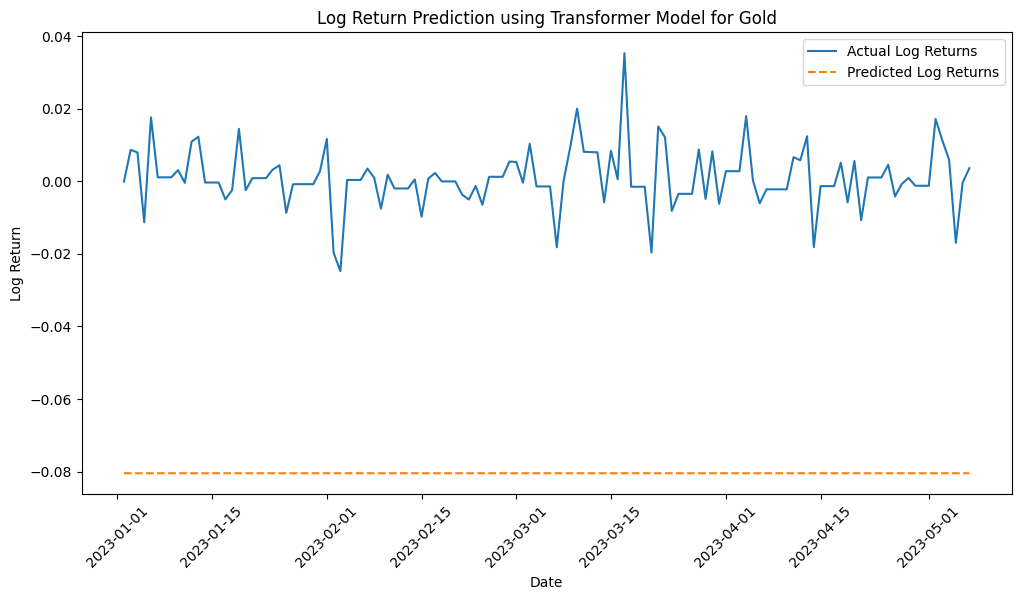

Training Transformer Model for Bitcoin
Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 227s 227s/step - loss: 0.7733 - val_loss: 0.6128
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step - loss: 0.7291 - val_loss: 0.5902
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step - loss: 0.6809 - val_loss: 0.5688
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - loss: 0.6279 - val_loss: 0.5484
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step - loss: 0.5828 - val_loss: 0.5282
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - loss: 0.5441 - val_loss: 0.5084
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - loss: 0.5056 - val_loss: 0.4883
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - loss: 0.4687 - val_loss: 0.4681
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - loss: 0.4338 - val_loss: 0.4478
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step - loss: 0.3940 - val_loss: 0.4274
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - loss: 0.3540 - val_loss: 0.4068
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━

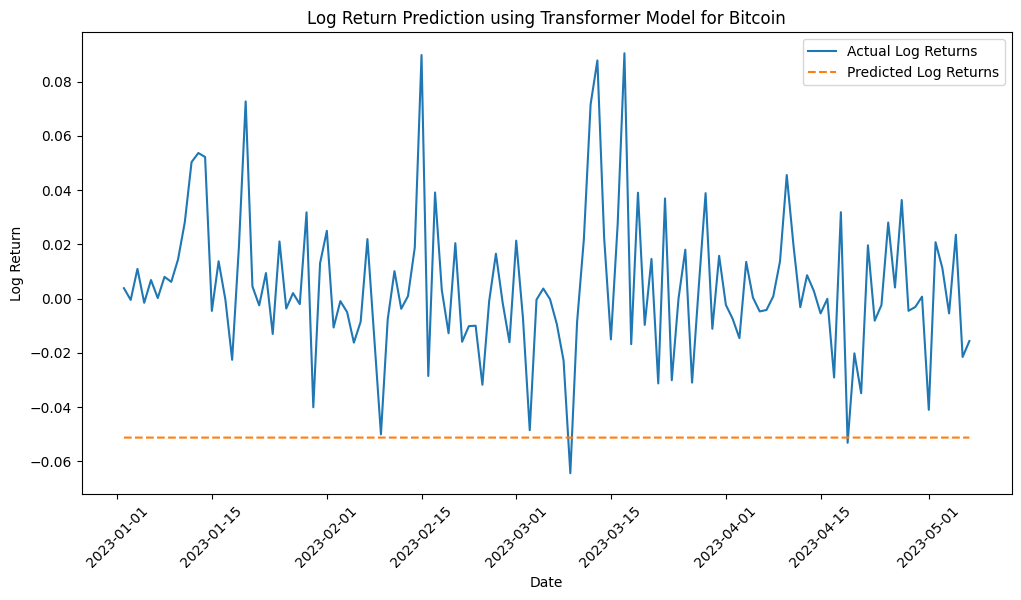

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LayerNormalization, Dropout, MultiHeadAttention, TimeDistributed
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Define COVID-19 timespan
covid_start_date = "2020-01-05"
covid_split_date = "2022-12-31"  # Training up to this date, validation starts after
covid_end_date = "2023-05-07"

# Adjustable parameters
num_heads = 4  # Increased number of attention heads
ff_dim = 64  # Increased dimensions in the feed-forward layer
dropout_rate = 0.1  # Dropout rate
epochs = 50  # Increased number of training epochs
batch_size = 16  # Batch size for training

# Function to prepare data for Transformer model
def prepare_data_transformer(asset_data, covid_data):
    if 'Date' not in asset_data.columns or 'Date' not in covid_data.columns:
        print("Error: Missing 'Date' column.")
        return None, None, None, None, None, None

    # Merge asset data with COVID data on Date
    combined_data = pd.merge(asset_data, covid_data, on='Date', how='inner')
    combined_data = combined_data[['Date', 'Log Return', 'Total_Cases', 'Delta_Total_Cases_per_Million_Weekly']]
    
    # Scale the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(combined_data[['Log Return', 'Total_Cases', 'Delta_Total_Cases_per_Million_Weekly']])
    
    # Split data into training and validation
    train_data = scaled_data[:len(combined_data[combined_data['Date'] <= covid_split_date])]
    val_data = scaled_data[len(combined_data[combined_data['Date'] <= covid_split_date]):]

    # Prepare training and validation inputs and targets
    X_train = train_data[:-1].reshape(1, len(train_data) - 1, -1)
    y_train = train_data[1:, 0].reshape(1, -1)
    X_val = val_data[:-1].reshape(1, len(val_data) - 1, -1)
    y_val = val_data[1:, 0].reshape(1, -1)

    actual_log_returns = combined_data['Log Return'].values[-len(y_val[0]):]
    return X_train, y_train, X_val, y_val, scaler, actual_log_returns, combined_data['Date'].values[-len(y_val[0]):]

# Define Transformer model architecture
def build_transformer_model(input_shape, num_heads, ff_dim, dropout_rate):
    inputs = Input(shape=(None, input_shape[-1]))
    x = LayerNormalization(epsilon=1e-6)(inputs)
    x = MultiHeadAttention(num_heads=num_heads, key_dim=input_shape[-1])(x, x)
    x = Dropout(dropout_rate)(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    x = TimeDistributed(Dense(ff_dim, activation='relu'))(x)
    outputs = TimeDistributed(Dense(1))(x)
    model = Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mse')
    return model

# Run only for Gold and Bitcoin
for asset_name, asset_data in ML_covid_data.items():
    if asset_name not in ['Gold', 'Bitcoin']:
        continue  # Skip assets other than Gold and Bitcoin
    
    print(f"Training Transformer Model for {asset_name}")
    
    # Prepare data with train-validation split
    X_train, y_train, X_val, y_val, scaler, actual_log_returns, validation_dates = prepare_data_transformer(asset_data, covid_data_daily_summary)
    
    if X_train is None:
        continue
    
    # Build and train the model
    input_shape = (X_train.shape[1], X_train.shape[2])
    transformer_model = build_transformer_model(input_shape, num_heads, ff_dim, dropout_rate)
    
    # Train the model with manual validation data
    transformer_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))
    
    # Predict and inverse scale the log return results on the validation set
    predicted_log_returns = transformer_model.predict(X_val).reshape(-1, 1)

    # Create a placeholder array with the same shape as `scaled_data` to hold the predicted values
    inverse_transform_input = np.zeros((predicted_log_returns.shape[0], X_val.shape[2]))
    inverse_transform_input[:, 0] = predicted_log_returns[:, 0]  # Place predictions in the first column

    # Perform inverse scaling on log returns
    predicted_log_returns = scaler.inverse_transform(inverse_transform_input)[:, 0]  # Extract the first column only

    # Plot the results using actual dates and log returns
    plt.figure(figsize=(12, 6))
    plt.plot(validation_dates, actual_log_returns, label="Actual Log Returns")
    plt.plot(validation_dates, predicted_log_returns, label="Predicted Log Returns", linestyle="dashed")
    plt.title(f"Log Return Prediction using Transformer Model for {asset_name}")
    plt.xlabel("Date")
    plt.ylabel("Log Return")
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()
